ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **07Oct20**

# Laboratory Work 06 (08Oct20)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `Maya Brown`

### Rubric for each assignment: 

|         Context           |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |
    

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file: 
   </span> labwork-xx.ipynb<span style="color:red"> on Blackboard.</span>

---
### Table of Assignments<a id="toa"></a>
* [Assignment 1 (25pts)](#a1) $\Amtrx=\Lmtrx\Umtrx$ factorization code.
 - [1.1)](#a11) Code the factorization in a `Python` function.
 - [1.2)](#a12) Import image as a matrix $\Amtrx$.
 - [1.3)](#a13) Verify the factorization of the symmetric part of $\overset{(100 \times 100)}{\Amtrx}$.
 - [1.4)](#a14) How many non-zero pivots?
* [Assignment 2 (35pts)](#a2) $\Pmtrx\Amtrx=\Lmtrx\Umtrx$ factorization code.
 - [2.1)](#a21) Code the factorization in a `Python` function.
 - [2.2)](#a22) Verify the factorization of the symmetric part of $\overset{(100 \times 100)}{\Amtrx}$.
 - [2.3)](#a23) How many row permutations were made?
 - [2.4)](#a24) How many non-zero pivots?
* [Assignment 3 (35pts)](#a3) $\Pmtrx\Amtrx\Qmtrx=\Lmtrx\Umtrx$ factorization code.
 - [3.1)](#a31) Code the factorization in a `Python` function.
 - [3.2)](#a32) Verify the factorization of the symmetric part of $\overset{(100 \times 100)}{\Amtrx}$.
 - [3.3)](#a33) How many row permutations were made? How many column permutations were made?
 - [3.4)](#a34) How many non-zero pivots?
* [Assignment 4 (5pts)](#a4)

 ---

## <span style="color:blue">[Assignment 1 (25 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa) Program (in a Python function) a $\Lmtrx\,\Umtrx$ factorization algorithm <b>(without using pivoting)</b> for a matrix $\overset{(m \times m)}{\Amtrx}$. The factorization is obtained by elimination steps $k = 1,\ldots,m-1$ so that</span>

<br>
<span style="color:blue">
\begin{equation*}
    A^{(k+1)}_{i,j} = A^{(k)}_{i,j} - A^{(k)}_{k,j}\, m_{i,k} \quad\quad \forall \quad\quad i=k+1,\ldots,m \quad\quad \text{and} \quad\quad j=k+1,\ldots,m
\end{equation*}
</span> 

### <span style="color:blue">where the multipliers $m_{i,k}$ are given by $m_{i,k} = \frac{A^{(k)}_{i,k}}{A^{(k)}_{k,k}}$. When $k = m-1$, $A^{(m)}_{i,j}$, is upper triangular, that is, $U_{i,j} = A^{(m)}_{i,j}$ . The lower triangular matrix is obtained using the multipliers $m_{i,k}$, that is $L_{i,j} = m_{i,j} \ \forall \ i>j$,  $L_{i,i}=1$, and $L_{i,j}=0 \ \forall \ i<j$.
</span><a id="a11"></a>

In [4]:

import numpy as np
a_mtrx = np.array( [[1., 2.,  3.],
                    [4., 5.,  6.],
                    [7., 8., 10.]] )


In [35]:
'''1.1) LU factorization function'''

def lu_factorization( a_mtrx, pivot_option=None ):
    
    u = np.copy(a_mtrx)
    l = np.eye(3,3)
    
    
    m = a_mtrx.shape[0]
    n = a_mtrx.shape[1]
        
    for k in range(n-1):
        pivot = u[k,k]
        for i in range (k+1, m):
                multiplier = u[i,k]/pivot
                l[i,k] = multiplier
                for j in range (k,n):
                
                    u[i,j]-=u[k,j] * multiplier
    return(l,u)


In [39]:
(l,u) = lu_factorization (a_mtrx)

print ('L =\n', l)
print ('U =\n', u)
#print (l @ u)
print ('LU - A =\n', l @ u - a_mtrx)

L =
 [[1. 0. 0.]
 [4. 1. 0.]
 [7. 2. 1.]]
U =
 [[ 1.  2.  3.]
 [ 0. -3. -6.]
 [ 0.  0.  1.]]
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8. 10.]]
LU - A =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### <span style="color:blue">[1.2)](#toa) Import the following image URL: 
        
 + https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cermet.png
</span>
<br>

### <span style="color:blue">as a matrix $\Amtrx$ (need internet connection) and show the matrix as an image.
</span><a id="a12"></a>

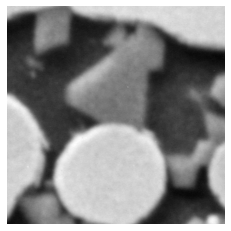

In [25]:
from matplotlib import pyplot as plt    
%matplotlib inline

block = plt.imread('https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cermet.png' , format='png' )
plt.imshow( block,  cmap='gray' ) 
plt.axis('off')
plt.show()

### <span style="color:blue">[1.3)](#toa) Compute the $\Lmtrx\Umtrx$ factorization of the symmetric part of $\overset{(100 \times 100)}{\Amtrx}$ and verify that your factorization is correct; explain. The symmetric part of a matrix $\Amtrx$ is defined as $\frac{\Amtrx+\Amtrx^\top}{2}$. Make a plot of your symmetric matrix.</span><a id="a13"></a>

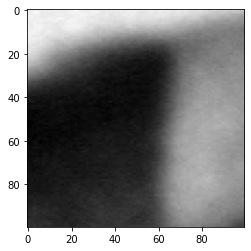

IndexError: index 3 is out of bounds for axis 0 with size 3

In [42]:
'''1.3) Perform LU factorization, verify and plot matrix'''

sub_block = block[0:100,0:100]
sym_a = np.array (sub_block)

plt.imshow(sym_a, cmap = 'gray')
plt.show()

(l, u) = lu_factorization(sym_a)
a1 = l @ u
plt.imshow(a1 , cmap = 'gray')
plt.show()

**Explanation:**

### <span style="color:blue">[1.4)](#toa) Print the diagonal entry of the $\Umtrx$ factor with smallest absolute value. Compute the number of non-zero pivots in $\Umtrx$.
</span><a id="a14"></a>

In [32]:
diag_u = np.diag(u)
min(abs(diag_u))
print (min(abs(np.diag(u))))

1.0


In [4]:
'''1.4) U diagonal entry w/ smallest magnitude and # of non-zero pivots'''


min(abs(diag(U)) =  1.47619e-03
# non-zero pivots =  100


## <span style="color:blue">[Assignment 2 (35 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa) Program (in a Python function; hint: extend the function from Assignment 1) a $\Lmtrx\,\Umtrx$ factorization algorithm (<b>using partial pivoting</b>) for a matrix $\overset{(m \times m)}{\Amtrx}$ and compute the $\Pmtrx\,\Lmtrx\,\Umtrx$ factors. The factorization is obtained by elimination steps $k = 1,\ldots,m-1$ so that</span>

<br>
<span style="color:blue">
\begin{equation*}
 A^{(k+1)}_{i,j} = A^{(k)}_{i,j} - A^{(k)}_{k,j}\, m_{i,k} \ \forall\ i=k+1,\ldots,m \ \text{and}\ j=k+1,\ldots,m
\end{equation*}
</span>

### <span style="color:blue">where the multipliers $m_{i,k}$ are given by $m_{i,k} = \frac{A^{(k)}_{i,k}}{A^{(k)}_{k,k}}$. When $k = m-1$, $A^{(m)}_{i,j}$, is upper triangular, that is, $U_{i,j} = A^{(m)}_{i,j}$ . The lower triangular matrix is obtained using the multipliers $m_{i,k}$, that is $L_{i,j} = m_{i,j} \ \forall \ i>j$,  $L_{i,i}=1$, and $L_{i,j}=0 \ \forall \ i<j$. However, every $k$-step selects a pivot $A^{(k)}_{k,k}$ of maximum absolute value via row exchanges recorded in the permutation matrix $\Pmtrx$.</span><a id="a21"></a>

In [43]:
'''2.1) LU factorization function'''
'''hint: extend 1.1) and avoid generating additional code here'''

a_mtrx = np.array( [[1., 2.,  3.],
                    [4., 5.,  6.],
                    [7., 8., 10.]] )
def lu_factorization( a_mtrx, pivoting_option =partial )


TypeError: lu_factorization() got an unexpected keyword argument 'pivoting_option'

### <span style="color:blue">[2.2)](#toa) Compute the  $\Lmtrx\Umtrx$ factorization of the symmetric part of $\overset{(100 \times 100)}{\Amtrx}$ using partial pivoting and verify that your factorization is correct; explain.</span><a id="a22"></a>

In [ ]:
'''2.2) Perform LU factorization and verify'''


**Explanation:**

### <span style="color:blue">[2.3)](#toa) How many row permutations were made?</span><a id="a23"></a>

number of permutations =  99


### <span style="color:blue">[2.4)](#toa) Print the diagonal entry of the $\Umtrx$ factor with smallest absolute value and compare with the value in 1.4); explain the difference if any. Compute the number of non-zero pivots in $\Umtrx$.
</span><a id="a24"></a>

In [7]:
'''2.4) U diagonal entry w/ smallest magnitude and # of non-zero pivots'''


min(abs(diag(U)) =  1.34517e-02
# non-zero pivots =  100


**Explanation:**

## <span style="color:blue">[Assignment 3 (35 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">[3.1)](#toa) Program (in a Python function; hint: extend the function from Assignment 1) a $\Lmtrx\,\Umtrx$ factorization algorithm (<b>using complete pivoting</b>) for a square matrix $\overset{(m \times m)}{\Amtrx}$ and compute the $\Pmtrx\,\Qmtrx\,\Lmtrx\,\Umtrx$ factors. The factorization is obtained by elimination steps $k = 1,\ldots,m-1$ so that</span> 

<br>
<span style="color:blue">
\begin{equation*}
A^{(k+1)}_{i,j} = A^{(k)}_{i,j} - A^{(k)}_{k,j}\, m_{i,k} \ \forall\ i=k+1,\ldots,m \ \text{and}\ j=k+1,\ldots,m
\end{equation*}
</span>
    
### <span style="color:blue">where the multipliers $m_{i,k}$ are given by $m_{i,k} = \frac{A^{(k)}_{i,k}}{A^{(k)}_{k,k}}$. When $k = m-1$, $A^{(m)}_{i,j}$ is upper triangular, that is, $U_{i,j} = A^{(m)}_{i,j}$ . The lower triangular matrix is obtained using the multipliers $m_{i,k}$, that is $L_{i,j} = m_{i,j} \ \forall \ i>j$,  $L_{i,i}=1$, and $L_{i,j}=0 \ \forall \ i<j$. However, every $k$-step selects a pivot $A^{(k)}_{k,k}$ of maximum absolute value via row exchanges recorded in the permutation matrix $\Pmtrx$, and column exchanges recorded in the permutation matrix $\Qmtrx$.
</span><a id="a31"></a>

In [ ]:
'''3.1) LU factorization function'''
'''hint: extend 1.1) and avoid generating additional code here'''


### <span style="color:blue">[3.2)](#toa) Compute the  $\Lmtrx\Umtrx$ factorization of the symmetric part of $\overset{(100 \times 100)}{\Amtrx}$ using complete pivoting and verify that your factorization is correct; explain.</span><a id="a32"></a>

In [ ]:
'''3.2 Perform LU factorization and verify'''

(p_mtrx, q_mtrx, l_mtrx, u_mtrx ) = lu_factorization( mtrx, pivot_option='complete' )

**Explanation:**

### <span style="color:blue">[3.3)](#toa) How many row permutations were made? How many column permutations were made?</span><a id="a33"></a>

number of row permutations =  100
number of column permutations =  100


### <span style="color:blue">[3.4)](#toa) Print the diagonal entry of the $\Umtrx$ factor with smallest absolute value and compare with the value in 2.4); explain the difference if any. Compute the number of non-zero pivots in $\Umtrx$.
</span><a id="a34"></a>

In [11]:
'''3.4) U diagonal entry w/ smallest magnitude and # of non-zero pivots'''


min(abs(diag(U)) =  1.26131e-02
# non-zero pivots =  100


**Explanation:**

## <span style="color:blue">[Assignment 4 (5 pts)](#toa)</span><a id="a4"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>